Notebook for analyse the avaiable data for training, test and validation

dataset: https://huggingface.co/datasets/dair-ai/emotion

In [15]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
import textstat
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords

In [16]:
# Load data
splits = {'train': 'split/train-00000-of-00001.parquet', 
          'validation': 'split/validation-00000-of-00001.parquet', 
          'test': 'split/test-00000-of-00001.parquet'}

# Load the datasets
train_data = pd.read_parquet("hf://datasets/dair-ai/emotion/" + splits["train"])
test_data = pd.read_parquet("hf://datasets/dair-ai/emotion/" + splits["test"])
validation_data = pd.read_parquet("hf://datasets/dair-ai/emotion/" + splits["validation"])

First rows of each df

In [18]:
train_data.head()

,text,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [19]:
test_data.head()

,text,label
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness


In [20]:
validation_data.head()

,text,label
0,im feeling quite sad and sorry for myself but ...,sadness
1,i feel like i am still looking at a blank canv...,sadness
2,i feel like a faithful servant,love
3,i am just feeling cranky and blue,anger
4,i can have for a treat or if i am feeling festive,joy


In [17]:
# Rename the labels in the dataframes
labels = {0: 'sadness',
          1: 'joy',
          2: 'love',
          3: 'anger',
          4: 'fear',
          5: 'surprise'}

# Map the labels to the corresponding values
train_data['label'] = train_data['label'].map(labels)
test_data['label'] = test_data['label'].map(labels)
validation_data['label'] = validation_data['label'].map(labels)

Check for labels distribution

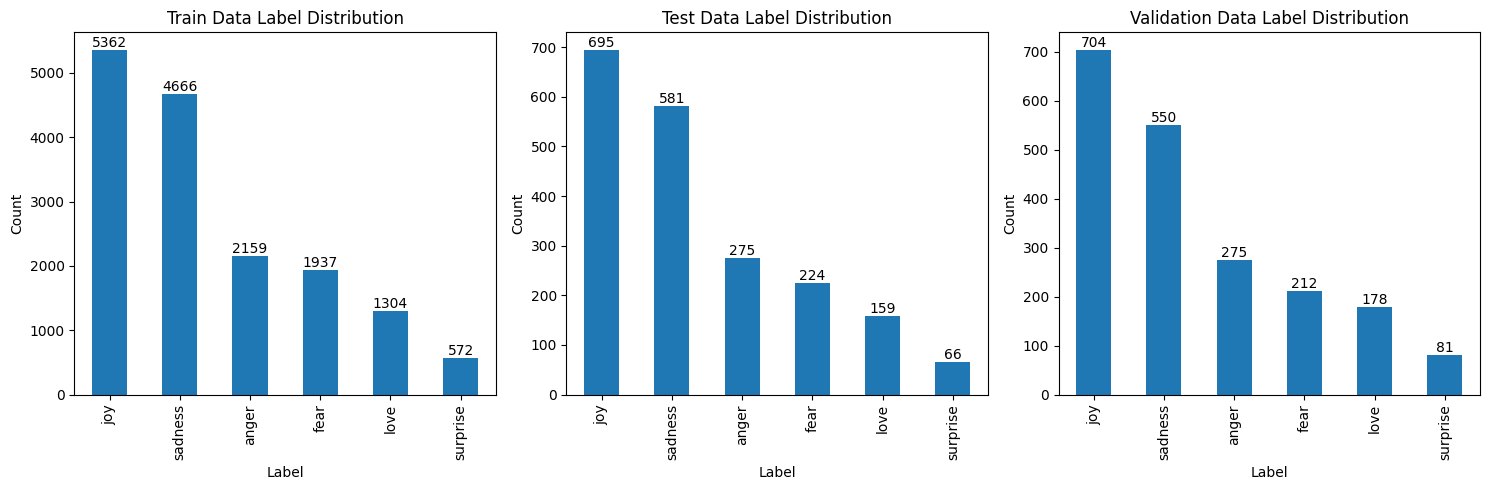

In [21]:
def plot_label_distribution(ax, data, title):
    """Plot the distribution of labels in the dataset."""
    counts = data.label.value_counts()
    counts.plot(kind='bar', ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Label')
    ax.set_ylabel('Count')
    # Add value annotations on top of the bars
    for p in ax.patches:
        ax.annotate(str(p.get_height()),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom')

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
plot_label_distribution(ax1, train_data, 'Train Data Label Distribution')
plot_label_distribution(ax2, test_data, 'Test Data Label Distribution')
plot_label_distribution(ax3, validation_data, 'Validation Data Label Distribution')
plt.tight_layout()
plt.show()

Check for word count distribution

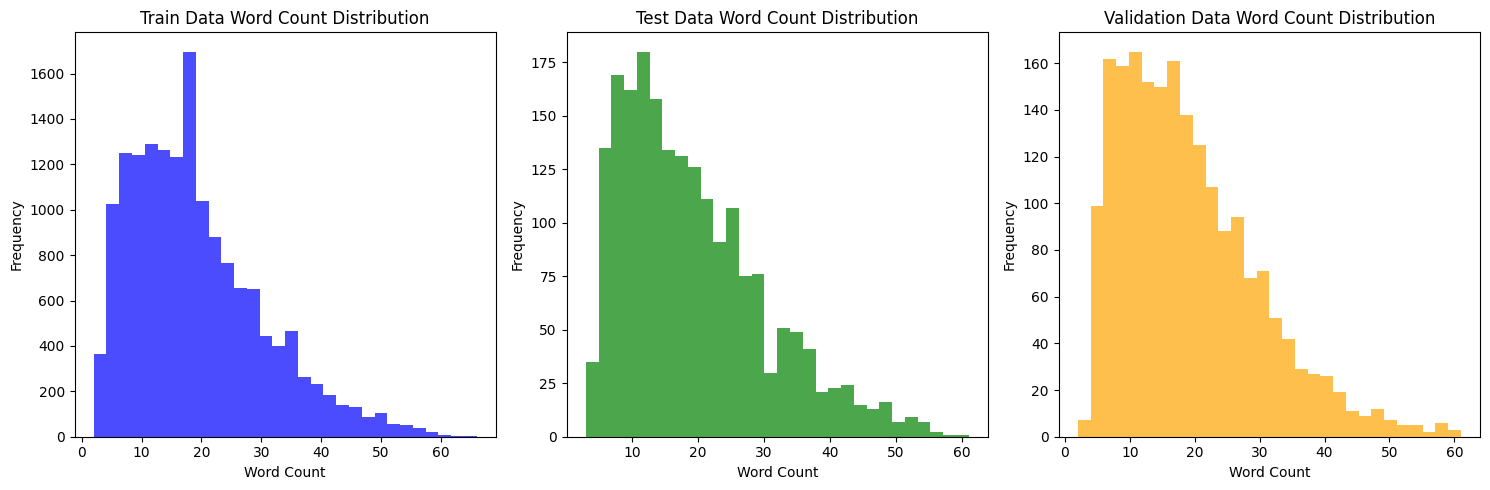

In [22]:
# Add a column for word count in each dataset
train_data['word_count'] = train_data['text'].apply(lambda x: len(x.split()))
test_data['word_count'] = test_data['text'].apply(lambda x: len(x.split()))
validation_data['word_count'] = validation_data['text'].apply(lambda x: len(x.split()))

# Plot the distribution of word counts
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
train_data['word_count'].plot(kind='hist', bins=30, ax=ax1, color='blue', alpha=0.7)
ax1.set_title('Train Data Word Count Distribution')
ax1.set_xlabel('Word Count')
ax1.set_ylabel('Frequency')

test_data['word_count'].plot(kind='hist', bins=30, ax=ax2, color='green', alpha=0.7)
ax2.set_title('Test Data Word Count Distribution')
ax2.set_xlabel('Word Count')
ax2.set_ylabel('Frequency')

validation_data['word_count'].plot(kind='hist', bins=30, ax=ax3, color='orange', alpha=0.7)
ax3.set_title('Validation Data Word Count Distribution')
ax3.set_xlabel('Word Count')
ax3.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Word cloud for frequencies analysis

[nltk_data] Downloading package stopwords to /home/nitro/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


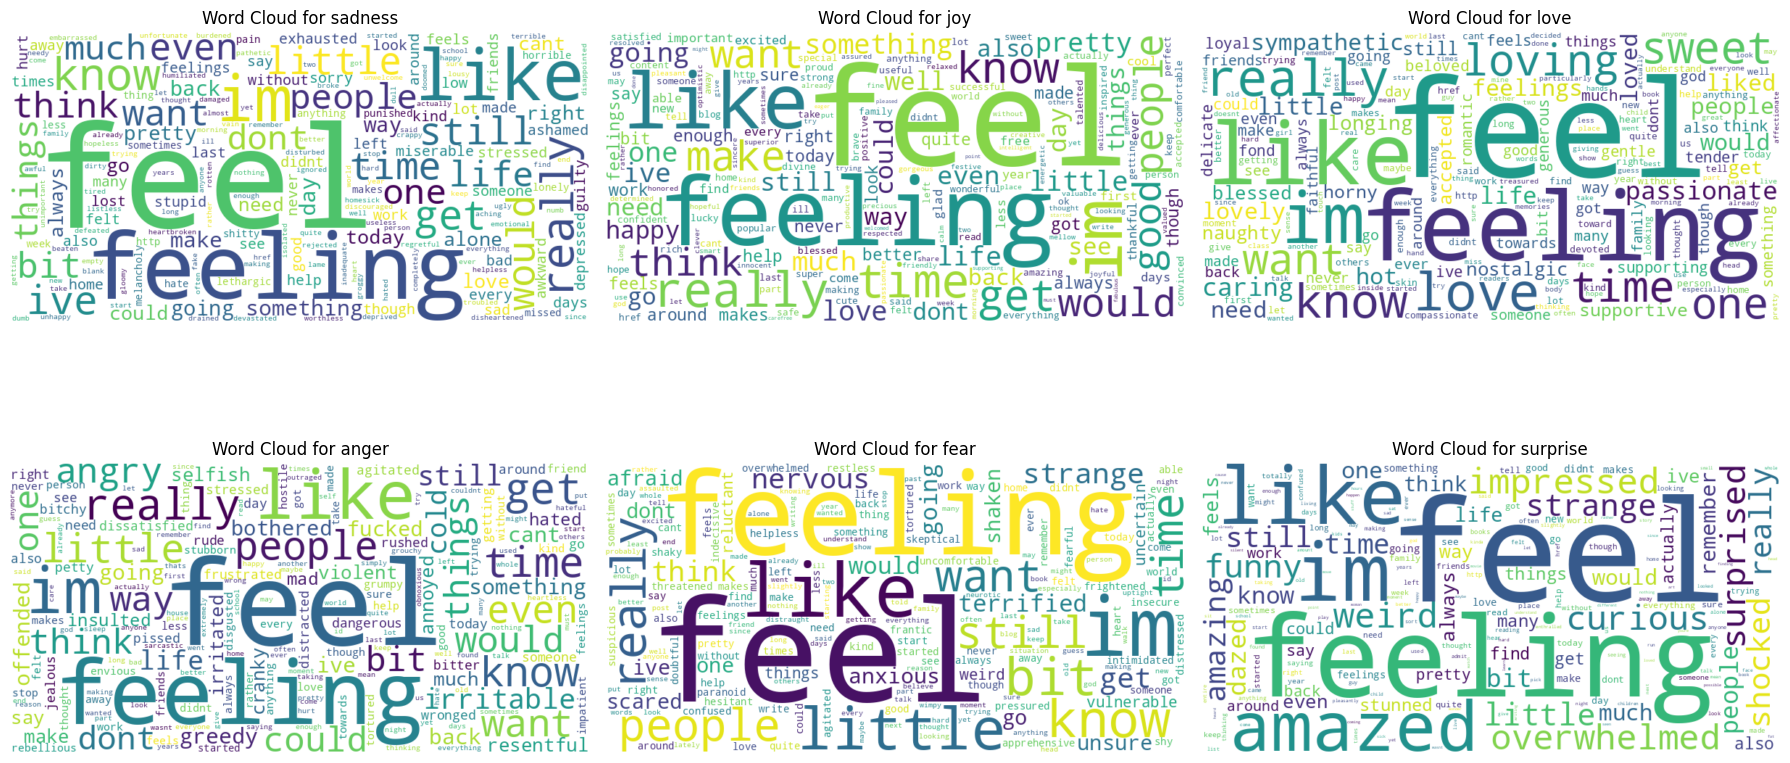

Most common words for sadness:
[('feel', 3299), ('feeling', 1523), ('like', 864), ('im', 683), ('really', 276), ('know', 275), ('get', 225), ('ive', 217), ('would', 203), ('still', 200)]

Most common words for joy:
[('feel', 3928), ('feeling', 1539), ('like', 1006), ('im', 799), ('really', 309), ('time', 290), ('get', 249), ('know', 240), ('make', 225), ('would', 205)]

Most common words for love:
[('feel', 929), ('feeling', 378), ('like', 306), ('im', 193), ('love', 97), ('really', 92), ('know', 79), ('sweet', 69), ('loving', 68), ('time', 68)]

Most common words for anger:
[('feel', 1459), ('feeling', 721), ('like', 384), ('im', 342), ('really', 124), ('get', 121), ('time', 118), ('know', 115), ('little', 105), ('people', 105)]

Most common words for fear:
[('feel', 1212), ('feeling', 742), ('im', 322), ('like', 258), ('little', 149), ('bit', 117), ('know', 117), ('really', 100), ('people', 87), ('want', 85)]

Most common words for surprise:
[('feel', 356), ('feeling', 209), ('im', 9

In [23]:
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Define a function to generate word clouds and word frequencies
def generate_word_cloud(data, label, ax):
    """Generate a word cloud for a specific label."""
    # Filter data for the given label
    subset = data[data['label'] == label]
    
    # Tokenize and remove stopwords
    stop_words = set(stopwords.words('english'))
    words = subset['text'].str.split().explode()
    filtered_words = [word.lower() for word in words if word.lower() not in stop_words]
    
    # Generate word frequencies
    word_freq = Counter(filtered_words)
    
    # Generate and display the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(f"Word Cloud for {label}")

    return word_freq

# Generate word clouds for each label
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

word_frequencies = {}
for i, label in enumerate(labels.values()):
    word_frequencies[label] = generate_word_cloud(train_data, label, axes[i])

plt.tight_layout()
plt.show()

# Display the most common words for each label
for label, freq in word_frequencies.items():
    print(f"Most common words for {label}:")
    print(freq.most_common(10))
    print()

Calculate Type-Token Ration (TTR)

In [24]:
def calculate_ttr(data):
    """Calculate the Type-Token Ratio (TTR) for a dataset."""
    total_words = data['text'].str.split().explode()
    unique_words = total_words.nunique()
    total_word_count = total_words.size
    return unique_words / total_word_count

# Calculate TTR for each dataset
train_ttr = calculate_ttr(train_data)
test_ttr = calculate_ttr(test_data)
validation_ttr = calculate_ttr(validation_data)

# Print the results
print(f"Train Data TTR: {train_ttr:.4f}")
print(f"Test Data TTR: {test_ttr:.4f}")
print(f"Validation Data TTR: {validation_ttr:.4f}")

Train Data TTR: 0.0496
Test Data TTR: 0.1252
Validation Data TTR: 0.1271


Check text anomalies

In [25]:
import re

def check_anomalies(data, dataset_name):
    """Check for missing values, empty strings, and unusual characters in the dataset."""
    print(f"Checking anomalies in {dataset_name} dataset:")
    
    # Check for missing values
    missing_values = data.isnull().sum()
    print("Missing values:")
    print(missing_values)
    
    # Check for empty strings in the 'text' column
    empty_strings = (data['text'].str.strip() == '').sum()
    print(f"Empty strings in 'text' column: {empty_strings}")
    
    # Check for unusual characters in the 'text' column
    unusual_characters = data['text'].apply(lambda x: bool(re.search(r'[^a-zA-Z0-9\s.,!?\'"-]', x))).sum()
    print(f"Rows with unusual characters in 'text' column: {unusual_characters}")
    print()

# Perform checks on each dataset
check_anomalies(train_data, "Train")
check_anomalies(test_data, "Test")
check_anomalies(validation_data, "Validation")

Checking anomalies in Train dataset:
Missing values:
text          0
label         0
word_count    0
dtype: int64
Empty strings in 'text' column: 0
Rows with unusual characters in 'text' column: 0

Checking anomalies in Test dataset:
Missing values:
text          0
label         0
word_count    0
dtype: int64
Empty strings in 'text' column: 0
Rows with unusual characters in 'text' column: 0

Checking anomalies in Validation dataset:
Missing values:
text          0
label         0
word_count    0
dtype: int64
Empty strings in 'text' column: 0
Rows with unusual characters in 'text' column: 0



Check sentiment readability

In [29]:
def analyze_sentiment_readability(data):
    """Analyze sentiment and readability for each label in the dataset."""
    results = []
    for label in data['label'].unique():
        subset = data[data['label'] == label].copy()  # Use .copy() to avoid SettingWithCopyWarning
        
        # Sentiment analysis
        subset.loc[:, 'polarity'] = subset['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
        subset.loc[:, 'subjectivity'] = subset['text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
        
        # Readability analysis
        subset.loc[:, 'readability'] = subset['text'].apply(lambda x: textstat.flesch_reading_ease(x))
        
        # Aggregate metrics
        avg_polarity = subset['polarity'].mean()
        avg_subjectivity = subset['subjectivity'].mean()
        avg_readability = subset['readability'].mean()
        
        results.append({
            'label': label,
            'avg_polarity': avg_polarity,
            'avg_subjectivity': avg_subjectivity,
            'avg_readability': avg_readability
        })
    
    return pd.DataFrame(results)

# Perform analysis on avaiable datasets
train_sentiment_readability_results = analyze_sentiment_readability(train_data)
test_sentiment_readability_results = analyze_sentiment_readability(test_data)
validation_sentiment_readability_results = analyze_sentiment_readability(validation_data)

# Display the results
print(train_sentiment_readability_results)
print('\n')
print(test_sentiment_readability_results)
print('\n')
print(validation_sentiment_readability_results)

      label  avg_polarity  avg_subjectivity  avg_readability
0   sadness     -0.106578          0.489521        69.188916
1     anger     -0.104715          0.476089        68.303279
2      love      0.176605          0.575537        68.768735
3  surprise      0.041812          0.613368        68.615682
4      fear     -0.057759          0.464800        66.955447
5       joy      0.249202          0.553746        68.396958


      label  avg_polarity  avg_subjectivity  avg_readability
0   sadness     -0.112508          0.493389        70.484836
1       joy      0.251606          0.535800        68.690878
2      fear     -0.087778          0.449672        67.113884
3     anger     -0.076963          0.476366        68.208255
4      love      0.165886          0.543011        70.589748
5  surprise      0.040409          0.569139        70.266212


      label  avg_polarity  avg_subjectivity  avg_readability
0   sadness     -0.111026          0.496724        69.002655
1      love      0.1